
### Libraries used


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import plot_confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
org_df = pd.read_csv('movies_metadata.csv')
df = org_df.copy()
df.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [3]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
df.shape

(45466, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

# EDA

## Title and Overview Wordclouds

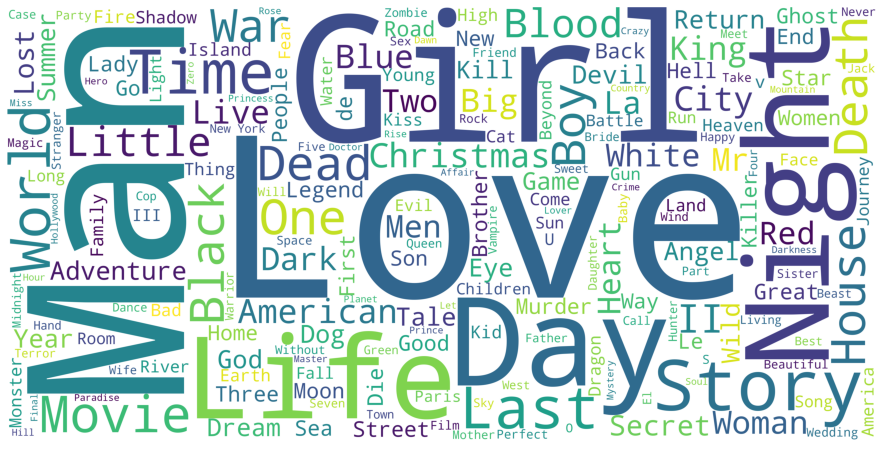

In [6]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

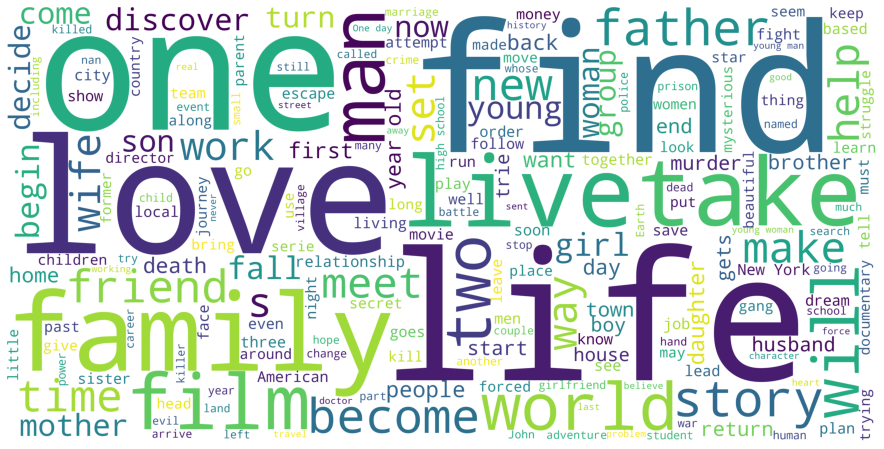

In [7]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

## Production Countries

In [8]:
import ast
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)

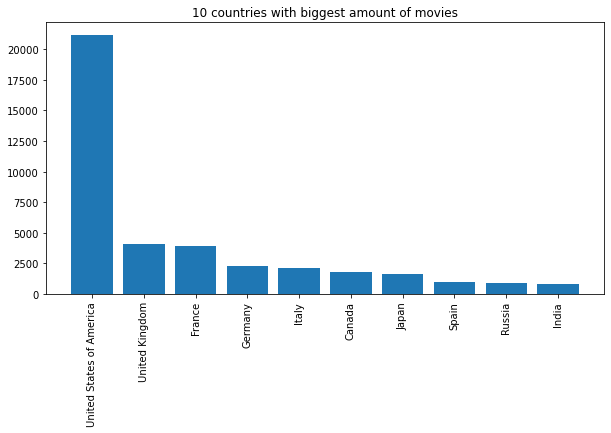

In [9]:
plt.figure(figsize=(10,5))
df_top = con_df.nlargest(10, 'num_movies')
plt.bar(df_top['country'], df_top['num_movies'])
plt.xticks(rotation='vertical')
plt.title('10 countries with biggest amount of movies')
plt.show()

## Production Companies

In [11]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'
com_df = df.drop('production_companies', axis=1).join(s)
com_df = pd.DataFrame(com_df['companies'].value_counts())
com_df['num_movies'] = com_df['companies']
com_df['companies'] = com_df.index
com_df = com_df.reset_index().drop('index', axis=1)

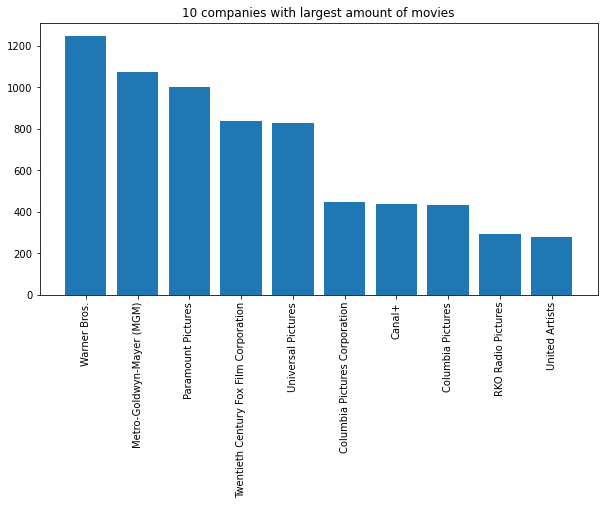

In [12]:
plt.figure(figsize=(10,5))
df_top = com_df.nlargest(10, 'num_movies')
plt.bar(df_top['companies'], df_top['num_movies'])
plt.xticks(rotation='vertical')
plt.title('10 companies with largest amount of movies')
plt.show()

## Popularity, Vote Average and Vote Count

In [13]:
df['popularity'] = pd.to_numeric(df['popularity'],errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'],errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'],errors='coerce')

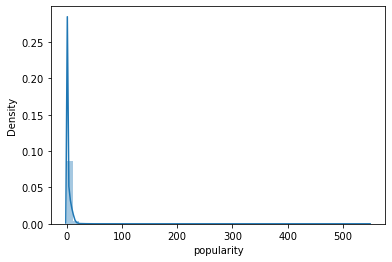

In [14]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

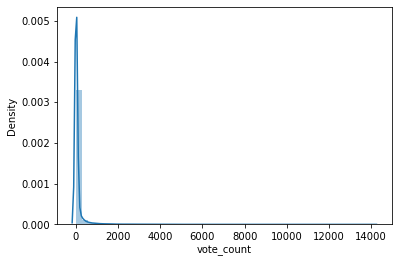

In [15]:
sns.distplot(df['vote_count'].fillna(df['vote_count'].median()))
plt.show()

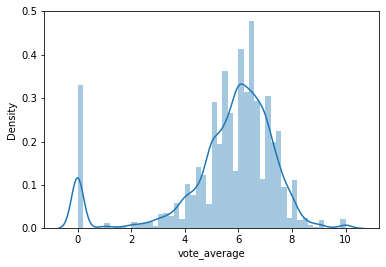

In [16]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))
plt.show()

# Predict Genres
*Research Question: Can we predict a movie genre?"*

*Answer: Yes, we can predict movies genre using ML classifers. I have apply 5 ML classifier for this question.*


## Data pre-processing

In [17]:
df = org_df.loc[:,['budget', 'genres', 'popularity', 'revenue', 'runtime','vote_average', 'vote_count']]

df['revenue'] = df['revenue'].replace(0, np.nan)
df['budget'] = pd.to_numeric(df['budget'],errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)

df['popularity'] = pd.to_numeric(df['popularity'],errors='coerce')

df = df[df['genres'].isin(["[{'id': 18, 'name': 'Drama'}]", "[{'id': 35, 'name': 'Comedy'}]"])] 

# "[{'id': 99, 'name': 'Documentary'}]", "[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]"])]
df['genres'] = df['genres'].replace("[{'id': 18, 'name': 'Drama'}]", 'Drama')
df['genres'] = df['genres'].replace("[{'id': 35, 'name': 'Comedy'}]", 'Comedy')
#df['genres'] = df['genres'].replace("[{'id': 99, 'name': 'Documentary'}]", 'Documentary')
#df['genres'] = df['genres'].replace("[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]", 'Romance')

df['genresID']= df["genres"]
df["genresID"] = df["genresID"].astype('category')
df["genresID"] = df["genresID"].cat.codes

df = df.dropna()
df.head()

,budget,genres,popularity,revenue,runtime,vote_average,vote_count,genresID
35,11000000.0,Drama,6.891317,39363635.0,122.0,7.3,350.0,1
68,3500000.0,Comedy,14.569650,28215918.0,91.0,7.0,513.0,0
102,12000000.0,Comedy,9.592265,41205099.0,92.0,6.5,767.0,0
139,31000000.0,Comedy,6.499680,185260553.0,117.0,6.7,303.0,0
147,52000000.0,Drama,18.761467,355237933.0,140.0,7.3,1637.0,1


In [18]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,genresID
count,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000
mean,1.832564e+07,7.822660,5.299700e+07,108.081429,6.332143,449.902857,0.544286
std,1.963974e+07,5.721801,7.496146e+07,20.091577,0.989116,736.159424,0.498391
min,1.000000e+00,0.003013,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.000000e+06,4.390761,3.992520e+06,95.000000,5.800000,53.000000,0.000000
50%,1.223419e+07,7.218081,2.231123e+07,105.000000,6.400000,192.500000,1.000000
75%,2.512416e+07,10.428633,7.242986e+07,120.000000,7.000000,545.750000,1.000000
max,1.300000e+08,64.299990,6.118994e+08,207.000000,8.600000,9678.000000,1.000000


## Split data as train and test

In [19]:
X = df.drop(['genres', 'genresID', ], axis = 1)
y = df['genresID'].values
XX_train, XX_test, y_train, y_test = train_test_split( df, y, test_size=0.20, random_state=42)

X_train = XX_train.drop(['genres', 'genresID', ], axis = 1)
X_test = XX_test.drop(['genres', 'genresID', ], axis = 1)

## Build Models

### 1. Decision Tree Classifier

Test Accuracy: 0.7571428571428571


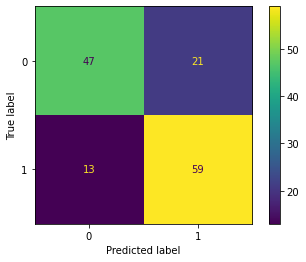

In [20]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
print('Test Accuracy:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test)

In [21]:
df_pred = XX_test.copy()
df_pred['prediction'] = pred_y
df_pred['prediction'] = df_pred['prediction'].replace(1, 'Drama')
df_pred['prediction'] = df_pred['prediction'].replace(0, 'Comedy')
genres = df_pred['genres'].values
df_pred = df_pred.drop(['genres'], axis = 1)
df_pred.insert(7, 'genres', genres)
df_pred

,budget,popularity,revenue,runtime,vote_average,vote_count,genresID,genres,prediction
3855,32000000.0,7.177649,48814909.0,129.0,7.0,556.0,1,Drama,Drama
20111,5773100.0,4.290276,18144030.0,98.0,6.1,98.0,1,Drama,Comedy
13602,20000000.0,11.362762,136267476.0,102.0,6.1,1388.0,0,Comedy,Comedy
3758,28000000.0,6.402888,90449929.0,98.0,5.8,574.0,0,Comedy,Comedy
11176,700000.0,12.155115,4911725.0,107.0,6.5,243.0,1,Drama,Drama
...,...,...,...,...,...,...,...,...,...
922,1.0,6.428830,5.0,115.0,7.5,163.0,1,Drama,Drama
6438,54000000.0,11.415316,7266209.0,121.0,3.5,105.0,1,Drama,Drama
15892,35000000.0,7.681383,60251371.0,123.0,6.8,103.0,1,Drama,Drama
9887,1500000.0,4.173231,712294.0,111.0,6.5,43.0,1,Drama,Drama


[0.78571429 0.77857143 0.8        0.67142857 0.67142857]


Text(0.5, 1.0, 'Validation Accuracy of Decistion Tree')

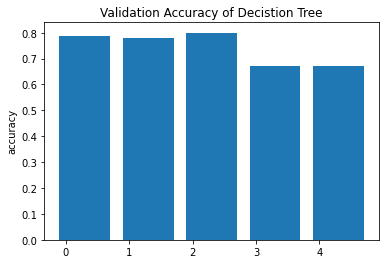

In [22]:
scores_dt = cross_val_score(estimator=clf, X=X, y=y, cv = 5)
index = np.arange(5) + 0.3
print(scores_dt)
plt.bar(index, scores_dt)
plt.ylabel("accuracy")
plt.title('Validation Accuracy of Decistion Tree')

### 2. Support Vector Machine

Test Accuracy: 0.6357142857142857


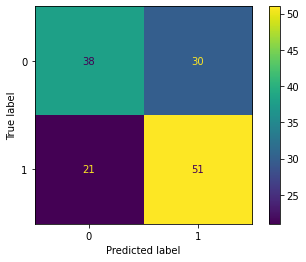

In [23]:
clf = SVC()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
print('Test Accuracy:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test)

In [24]:
df_pred = XX_test.copy()
df_pred['prediction'] = pred_y
df_pred['prediction'] = df_pred['prediction'].replace(1, 'Drama')
df_pred['prediction'] = df_pred['prediction'].replace(0, 'Comedy')
genres = df_pred['genres'].values
df_pred = df_pred.drop(['genres'], axis = 1)
df_pred.insert(7, 'genres', genres)
df_pred

,budget,popularity,revenue,runtime,vote_average,vote_count,genresID,genres,prediction
3855,32000000.0,7.177649,48814909.0,129.0,7.0,556.0,1,Drama,Comedy
20111,5773100.0,4.290276,18144030.0,98.0,6.1,98.0,1,Drama,Drama
13602,20000000.0,11.362762,136267476.0,102.0,6.1,1388.0,0,Comedy,Comedy
3758,28000000.0,6.402888,90449929.0,98.0,5.8,574.0,0,Comedy,Comedy
11176,700000.0,12.155115,4911725.0,107.0,6.5,243.0,1,Drama,Drama
...,...,...,...,...,...,...,...,...,...
922,1.0,6.428830,5.0,115.0,7.5,163.0,1,Drama,Drama
6438,54000000.0,11.415316,7266209.0,121.0,3.5,105.0,1,Drama,Drama
15892,35000000.0,7.681383,60251371.0,123.0,6.8,103.0,1,Drama,Comedy
9887,1500000.0,4.173231,712294.0,111.0,6.5,43.0,1,Drama,Drama


[0.53571429 0.56428571 0.66428571 0.63571429 0.64285714]


Text(0.5, 1.0, 'Validation Accuracy of SVM')

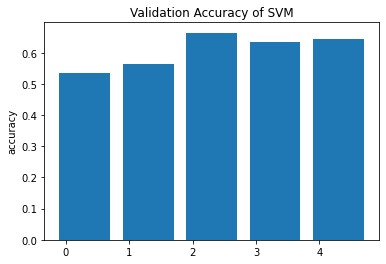

In [25]:
scores_svm = cross_val_score(estimator=clf, X=X, y=y, cv = 5)
index = np.arange(5) + 0.3
print(scores_svm)
plt.bar(index, scores_svm)
plt.ylabel("accuracy")
plt.title('Validation Accuracy of SVM')

### 3. AdaBoost Classifier

Test Accuracy: 0.7285714285714285


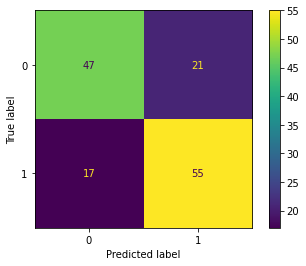

In [26]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
print('Test Accuracy:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test)

In [27]:
df_pred = XX_test.copy()
df_pred['prediction'] = pred_y
df_pred['prediction'] = df_pred['prediction'].replace(1, 'Drama')
df_pred['prediction'] = df_pred['prediction'].replace(0, 'Comedy')
genres = df_pred['genres'].values
df_pred = df_pred.drop(['genres'], axis = 1)
df_pred.insert(7, 'genres', genres)
df_pred

,budget,popularity,revenue,runtime,vote_average,vote_count,genresID,genres,prediction
3855,32000000.0,7.177649,48814909.0,129.0,7.0,556.0,1,Drama,Drama
20111,5773100.0,4.290276,18144030.0,98.0,6.1,98.0,1,Drama,Comedy
13602,20000000.0,11.362762,136267476.0,102.0,6.1,1388.0,0,Comedy,Comedy
3758,28000000.0,6.402888,90449929.0,98.0,5.8,574.0,0,Comedy,Comedy
11176,700000.0,12.155115,4911725.0,107.0,6.5,243.0,1,Drama,Drama
...,...,...,...,...,...,...,...,...,...
922,1.0,6.428830,5.0,115.0,7.5,163.0,1,Drama,Drama
6438,54000000.0,11.415316,7266209.0,121.0,3.5,105.0,1,Drama,Comedy
15892,35000000.0,7.681383,60251371.0,123.0,6.8,103.0,1,Drama,Drama
9887,1500000.0,4.173231,712294.0,111.0,6.5,43.0,1,Drama,Drama


[0.80714286 0.82142857 0.82857143 0.69285714 0.77857143]


Text(0.5, 1.0, 'Validation Accuracy of AdaBoostClassifier')

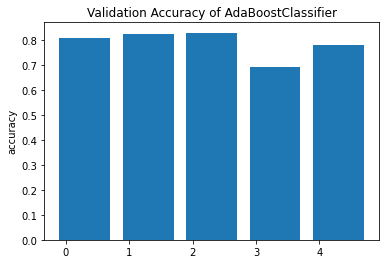

In [28]:
scores_ad = cross_val_score(estimator=clf, X=X, y=y, cv = 5)
index = np.arange(5) + 0.3
print(scores_ad)
plt.bar(index, scores_ad)
plt.ylabel("accuracy")
plt.title('Validation Accuracy of AdaBoostClassifier')

### 4. Naive Bayes (GaussianNB)

Test Accuracy: 0.6142857142857143


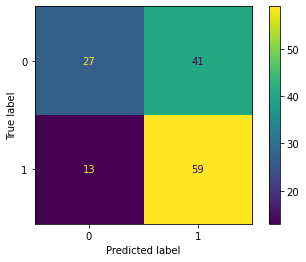

In [29]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
print('Test Accuracy:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test)

In [30]:
df_pred = XX_test.copy()
df_pred['prediction'] = pred_y
df_pred['prediction'] = df_pred['prediction'].replace(1, 'Drama')
df_pred['prediction'] = df_pred['prediction'].replace(0, 'Comedy')
genres = df_pred['genres'].values
df_pred = df_pred.drop(['genres'], axis = 1)
df_pred.insert(7, 'genres', genres)
df_pred

,budget,popularity,revenue,runtime,vote_average,vote_count,genresID,genres,prediction
3855,32000000.0,7.177649,48814909.0,129.0,7.0,556.0,1,Drama,Comedy
20111,5773100.0,4.290276,18144030.0,98.0,6.1,98.0,1,Drama,Drama
13602,20000000.0,11.362762,136267476.0,102.0,6.1,1388.0,0,Comedy,Comedy
3758,28000000.0,6.402888,90449929.0,98.0,5.8,574.0,0,Comedy,Comedy
11176,700000.0,12.155115,4911725.0,107.0,6.5,243.0,1,Drama,Drama
...,...,...,...,...,...,...,...,...,...
922,1.0,6.428830,5.0,115.0,7.5,163.0,1,Drama,Drama
6438,54000000.0,11.415316,7266209.0,121.0,3.5,105.0,1,Drama,Comedy
15892,35000000.0,7.681383,60251371.0,123.0,6.8,103.0,1,Drama,Comedy
9887,1500000.0,4.173231,712294.0,111.0,6.5,43.0,1,Drama,Drama


[0.55       0.52142857 0.60714286 0.61428571 0.64285714]


Text(0.5, 1.0, 'Validation Accuracy of GaussianNB')

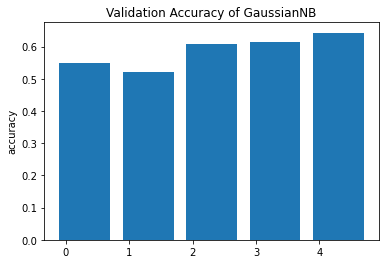

In [31]:
scores_nb = cross_val_score(estimator=clf, X=X, y=y, cv = 5)
index = np.arange(5) + 0.3
print(scores_nb)
plt.bar(index, scores_nb)
plt.ylabel("accuracy")
plt.title('Validation Accuracy of GaussianNB')

### 5. KNeighbors Classifier

Test Accuracy: 0.5714285714285714


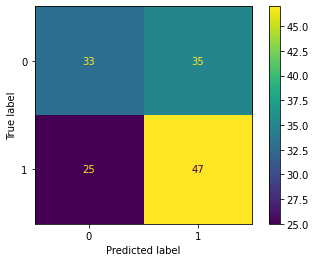

In [32]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
print('Test Accuracy:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test)

In [33]:
df_pred = XX_test.copy()
df_pred['prediction'] = pred_y
df_pred['prediction'] = df_pred['prediction'].replace(1, 'Drama')
df_pred['prediction'] = df_pred['prediction'].replace(0, 'Comedy')
genres = df_pred['genres'].values
df_pred = df_pred.drop(['genres'], axis = 1)
df_pred.insert(7, 'genres', genres)
df_pred

,budget,popularity,revenue,runtime,vote_average,vote_count,genresID,genres,prediction
3855,32000000.0,7.177649,48814909.0,129.0,7.0,556.0,1,Drama,Comedy
20111,5773100.0,4.290276,18144030.0,98.0,6.1,98.0,1,Drama,Drama
13602,20000000.0,11.362762,136267476.0,102.0,6.1,1388.0,0,Comedy,Comedy
3758,28000000.0,6.402888,90449929.0,98.0,5.8,574.0,0,Comedy,Comedy
11176,700000.0,12.155115,4911725.0,107.0,6.5,243.0,1,Drama,Drama
...,...,...,...,...,...,...,...,...,...
922,1.0,6.428830,5.0,115.0,7.5,163.0,1,Drama,Drama
6438,54000000.0,11.415316,7266209.0,121.0,3.5,105.0,1,Drama,Drama
15892,35000000.0,7.681383,60251371.0,123.0,6.8,103.0,1,Drama,Comedy
9887,1500000.0,4.173231,712294.0,111.0,6.5,43.0,1,Drama,Drama


[0.60714286 0.53571429 0.54285714 0.57857143 0.57142857]


Text(0.5, 1.0, 'Validation Accuracy of KNN')

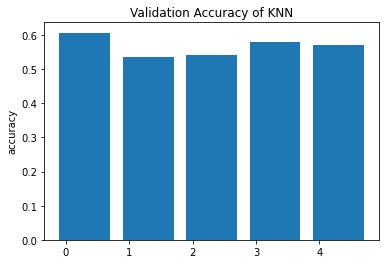

In [34]:
scores_knn = cross_val_score(estimator=clf, X=X, y=y, cv = 5)
index = np.arange(5) + 0.3
print(scores_knn)
plt.bar(index, scores_knn)
plt.ylabel("accuracy")
plt.title('Validation Accuracy of KNN')

### Test Result

In [35]:
result = pd.DataFrame(
    {'DecisionTreeClassifier': scores_dt,
     'SVM': scores_svm,
     'AdaboostClassifier': scores_ad,
     'Naive Bayes':scores_nb,
     'KNN':scores_knn
    })
mean = np.mean(result.values, axis=0)
result = result.transpose()
result['mean'] = mean
result

,0,1,2,3,4,mean
DecisionTreeClassifier,0.785714,0.778571,0.800000,0.671429,0.671429,0.741429
SVM,0.535714,0.564286,0.664286,0.635714,0.642857,0.608571
AdaboostClassifier,0.807143,0.821429,0.828571,0.692857,0.778571,0.785714
Naive Bayes,0.550000,0.521429,0.607143,0.614286,0.642857,0.587143
KNN,0.607143,0.535714,0.542857,0.578571,0.571429,0.567143


The AdaboostClassifier give the highest accuracy.

# Predict Revenue
*Research Question: Can we predict a movie earnings?"*

*Answer: We can use only Linear regression for this qeustion, since the revenu is continuos vlaues not categorical. I applied linear regression, but it doesn't give good result. It shows that it's impossble to predict revenu using linear regression.*

## Split Dataset as tran and Test

In [36]:
X = df.drop(['genres', 'revenue'], axis = 1)
y = df['revenue'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

## Build Models

### Linear Regression

In [37]:
reg = LinearRegression(normalize = True)
reg.fit(X_train, y_train)
pred_y = reg.predict(X_test)
print('Coefficient of determination of the prediction:', reg.score(X_test, y_test))
print('RMSE between prediction and test revenue:', np.sqrt(mean_squared_error(y_test, pred_y)))

Coefficient of determination of the prediction: 0.5532539143068638
RMSE between prediction and test revenue: 52405788.27264838


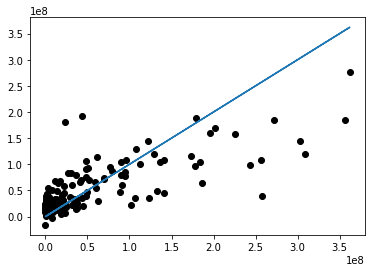

In [38]:
plt.plot(y_test, pred_y, 'o', color='black')
plt.plot(y_test,y_test)

The score of linear regression is 0.55 and the RMSE between real and predicted revenue is 52405788. And from above graph, we can see that the revenue isn't linear for other variables. Hence,we couldn't use linear regression model to predict the revenue.

Text(0.5, 1.0, 'RMSE of Validation Linear Regression')

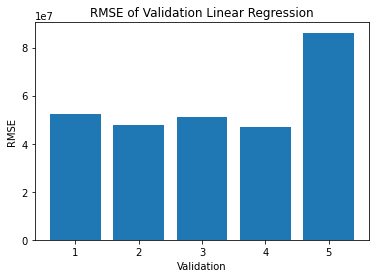

In [39]:
from sklearn.model_selection import KFold
rmse = []
kf = KFold(n_splits=5, shuffle  = True, random_state = 42)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_val_train, X_val_test = X.iloc[train_index], X.iloc[test_index]
    y_val_train, y_val_test = y[train_index], y[test_index]
    reg.fit(X_val_train, y_val_train)

    y_val_pred = reg.predict(X_val_test)
    rmse.append(np.sqrt(mean_squared_error(y_val_test, y_val_pred)))
plt.bar(range(1,6), rmse)
plt.xlabel('Validation')
plt.ylabel('RMSE')
plt.title('RMSE of Validation Linear Regression')

The revenu isn't categorical and continuous variabale. Hence, we couldn't apply other methods to predict the revenu, since other methods are classifier. 
AdaBoostClassifier, DecisionTreeClassifier, GaussianNB, SVM, KNN, LogisticRegression can apply only for classify problems.

# Predict Countries (Additional Question)
*Research Question: Can we predict countires?"*

*AAnswer: Yes, we can predict movies countires using ML classifers. I have apply 6 ML classifier for this question.*

## Data Pre-Processing

In [40]:
df = org_df.loc[:,['budget', 'popularity', 'revenue', 'runtime','vote_average', 'vote_count']]

df['country'] = org_df['production_countries']
df['revenue'] = df['revenue'].replace(0, np.nan)
df['budget'] = pd.to_numeric(df['budget'],errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df['popularity'] = pd.to_numeric(df['popularity'],errors='coerce')

country_names = ["[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",
                "[{'iso_3166_1': 'FR', 'name': 'France'}]", "[{'iso_3166_1': 'JP', 'name': 'Japan'}]"]

df = df[df['country'].isin(country_names)] 
df['country'] = df['country'].replace("[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]", 'United Kingdom')
df['country'] = df['country'].replace("[{'iso_3166_1': 'FR', 'name': 'France'}]", 'France')
df['country'] = df['country'].replace("[{'iso_3166_1': 'JP', 'name': 'Japan'}]", 'Japan')

df['countryID']= df["country"]
df["countryID"] = df["countryID"].astype('category')
df["countryID"] = df["countryID"].cat.codes
df = df.dropna()
df.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,country,countryID
145,4000000.0,0.922958,851545.0,113.0,6.0,11.0,United Kingdom,2
352,6000000.0,8.990345,254700832.0,117.0,6.6,654.0,United Kingdom,2
701,35000000.0,1.690768,15000000.0,135.0,6.7,25.0,France,0
758,4000000.0,19.348466,16491080.0,93.0,7.8,2737.0,United Kingdom,2
1026,7000000.0,3.379677,405000.0,123.0,6.6,38.0,United Kingdom,2


In [41]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,countryID
count,2.030000e+02,203.000000,2.030000e+02,203.000000,203.000000,203.000000,203.000000
mean,1.371556e+07,8.591171,4.385767e+07,108.389163,6.688177,526.054187,1.334975
std,2.005429e+07,5.881847,7.227935e+07,18.965348,0.713975,896.308161,0.859489
min,7.000000e+00,0.110065,1.000000e+00,66.000000,4.700000,6.000000,0.000000
25%,3.512454e+06,5.164896,2.477687e+06,95.000000,6.200000,82.500000,0.000000
50%,7.000000e+06,7.787593,1.649108e+07,106.000000,6.600000,213.000000,2.000000
75%,1.500000e+07,10.846166,4.856574e+07,117.500000,7.200000,556.500000,2.000000
max,1.974717e+08,52.854103,4.264809e+08,216.000000,8.300000,5895.000000,2.000000


## Split data as train and test

In [42]:
X = df.drop(['country', 'countryID'], axis = 1)
y = df['countryID'].values
XX_train, XX_test, y_train, y_test = train_test_split( df, y, test_size=0.20, random_state=42)

X_train = XX_train.drop(['country', 'countryID'], axis = 1)
X_test = XX_test.drop(['country', 'countryID'], axis = 1)

## Build Model

### 1. DecisionTreeClassifier

Test Accuracy: 0.5853658536585366


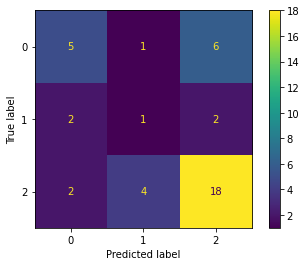

In [43]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
print('Test Accuracy:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test)

In [44]:
df_pred = XX_test.copy()
df_pred['prediction'] = pred_y
df_pred['prediction'] = df_pred['prediction'].replace(0, 'France')
df_pred['prediction'] = df_pred['prediction'].replace(1, 'Japan')
df_pred['prediction'] = df_pred['prediction'].replace(2, 'United Kingdom')
genres = df_pred['country'].values
df_pred = df_pred.drop(['country'], axis = 1)
df_pred.insert(7, 'country', genres)
df_pred.head(10)

,budget,popularity,revenue,runtime,vote_average,vote_count,countryID,country,prediction
1460,90000000.0,24.305260,263920180.0,126.0,7.3,3962.0,0,France,France
1162,15000000.0,10.893332,69995385.0,216.0,7.8,870.0,2,United Kingdom,Japan
13264,41677699.0,8.470945,187479518.0,100.0,7.5,953.0,1,Japan,Japan
7878,14500000.0,5.892859,65497208.0,82.0,5.5,367.0,0,France,France
6226,5300000.0,5.943950,3897799.0,122.0,7.0,276.0,0,France,Japan
3794,3000000.0,8.541732,12090735.0,97.0,6.3,227.0,2,United Kingdom,United Kingdom
18199,10000000.0,6.091224,17511906.0,111.0,7.2,200.0,0,France,United Kingdom
25202,55000000.0,15.686837,259207227.0,95.0,7.0,899.0,2,United Kingdom,France
43738,3500000.0,1.333969,1492523.0,105.0,7.3,34.0,0,France,United Kingdom
28784,4000000.0,5.099557,29456000.0,100.0,6.3,98.0,0,France,United Kingdom


[0.56097561 0.51219512 0.48780488 0.475      0.55      ]


Text(0.5, 1.0, 'Validation Accuracy of Decision Tree Classifier')

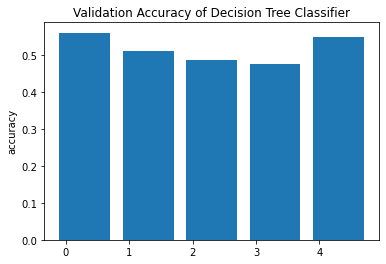

In [45]:
scores_dt = cross_val_score(estimator=clf, X=X, y=y, cv = 5)
index = np.arange(5) + 0.3
print(scores_dt)
plt.bar(index, scores_dt)
plt.ylabel("accuracy")
plt.title('Validation Accuracy of Decision Tree Classifier')

### 2. Support Vector Machine

Test Accuracy: 0.6097560975609756


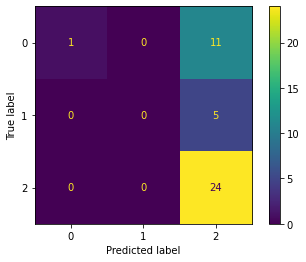

In [46]:
clf = SVC()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
print('Test Accuracy:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test)

In [47]:
df_pred = XX_test.copy()
df_pred['prediction'] = pred_y
df_pred['prediction'] = df_pred['prediction'].replace(0, 'France')
df_pred['prediction'] = df_pred['prediction'].replace(1, 'Japan')
df_pred['prediction'] = df_pred['prediction'].replace(2, 'United Kingdom')
genres = df_pred['country'].values
df_pred = df_pred.drop(['country'], axis = 1)
df_pred.insert(7, 'country', genres)
df_pred.head(10)

,budget,popularity,revenue,runtime,vote_average,vote_count,countryID,country,prediction
1460,90000000.0,24.305260,263920180.0,126.0,7.3,3962.0,0,France,United Kingdom
1162,15000000.0,10.893332,69995385.0,216.0,7.8,870.0,2,United Kingdom,United Kingdom
13264,41677699.0,8.470945,187479518.0,100.0,7.5,953.0,1,Japan,United Kingdom
7878,14500000.0,5.892859,65497208.0,82.0,5.5,367.0,0,France,United Kingdom
6226,5300000.0,5.943950,3897799.0,122.0,7.0,276.0,0,France,United Kingdom
3794,3000000.0,8.541732,12090735.0,97.0,6.3,227.0,2,United Kingdom,United Kingdom
18199,10000000.0,6.091224,17511906.0,111.0,7.2,200.0,0,France,United Kingdom
25202,55000000.0,15.686837,259207227.0,95.0,7.0,899.0,2,United Kingdom,United Kingdom
43738,3500000.0,1.333969,1492523.0,105.0,7.3,34.0,0,France,United Kingdom
28784,4000000.0,5.099557,29456000.0,100.0,6.3,98.0,0,France,United Kingdom


[0.6097561  0.6097561  0.58536585 0.6        0.65      ]


Text(0.5, 1.0, 'Validation Accuracy of SVM')

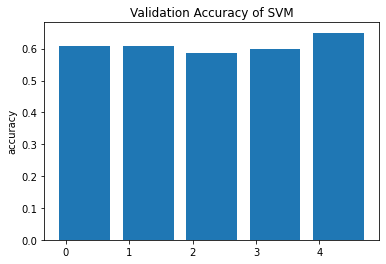

In [48]:
scores_svm = cross_val_score(estimator=clf, X=X, y=y, cv = 5)
index = np.arange(5) + 0.3
print(scores_svm)
plt.bar(index, scores_svm)
plt.ylabel("accuracy")
plt.title('Validation Accuracy of SVM')

### 3. Adaboost Classifier

Test Accuracy: 0.5853658536585366


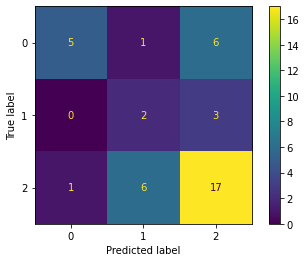

In [49]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
print('Test Accuracy:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test)

In [50]:
df_pred = XX_test.copy()
df_pred['prediction'] = pred_y
df_pred['prediction'] = df_pred['prediction'].replace(0, 'France')
df_pred['prediction'] = df_pred['prediction'].replace(1, 'Japan')
df_pred['prediction'] = df_pred['prediction'].replace(2, 'United Kingdom')
genres = df_pred['country'].values
df_pred = df_pred.drop(['country'], axis = 1)
df_pred.insert(7, 'country', genres)
df_pred.head(10)

,budget,popularity,revenue,runtime,vote_average,vote_count,countryID,country,prediction
1460,90000000.0,24.305260,263920180.0,126.0,7.3,3962.0,0,France,France
1162,15000000.0,10.893332,69995385.0,216.0,7.8,870.0,2,United Kingdom,Japan
13264,41677699.0,8.470945,187479518.0,100.0,7.5,953.0,1,Japan,Japan
7878,14500000.0,5.892859,65497208.0,82.0,5.5,367.0,0,France,France
6226,5300000.0,5.943950,3897799.0,122.0,7.0,276.0,0,France,United Kingdom
3794,3000000.0,8.541732,12090735.0,97.0,6.3,227.0,2,United Kingdom,United Kingdom
18199,10000000.0,6.091224,17511906.0,111.0,7.2,200.0,0,France,United Kingdom
25202,55000000.0,15.686837,259207227.0,95.0,7.0,899.0,2,United Kingdom,United Kingdom
43738,3500000.0,1.333969,1492523.0,105.0,7.3,34.0,0,France,United Kingdom
28784,4000000.0,5.099557,29456000.0,100.0,6.3,98.0,0,France,United Kingdom


[0.46341463 0.56097561 0.58536585 0.525      0.55      ]


Text(0.5, 1.0, 'Validation Accuracy of AdaBoost Classifier')

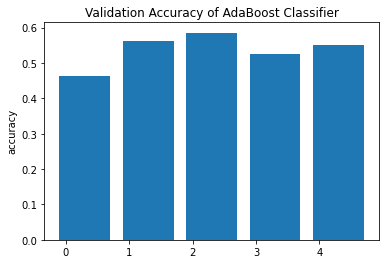

In [51]:
scores_ad = cross_val_score(estimator=clf, X=X, y=y, cv = 5)
index = np.arange(5) + 0.3
print(scores_ad)
plt.bar(index, scores_ad)
plt.ylabel("accuracy")
plt.title('Validation Accuracy of AdaBoost Classifier')

### 4. Naive Bayes Classifer

Test Accuracy: 0.6097560975609756


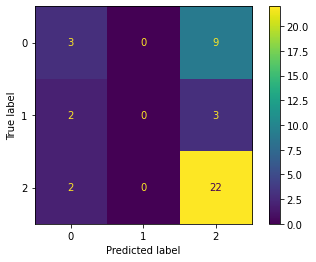

In [52]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
print('Test Accuracy:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test)

In [53]:
df_pred = XX_test.copy()
df_pred['prediction'] = pred_y
df_pred['prediction'] = df_pred['prediction'].replace(0, 'France')
df_pred['prediction'] = df_pred['prediction'].replace(1, 'Japan')
df_pred['prediction'] = df_pred['prediction'].replace(2, 'United Kingdom')
genres = df_pred['country'].values
df_pred = df_pred.drop(['country'], axis = 1)
df_pred.insert(7, 'country', genres)
df_pred.head(10)

,budget,popularity,revenue,runtime,vote_average,vote_count,countryID,country,prediction
1460,90000000.0,24.305260,263920180.0,126.0,7.3,3962.0,0,France,France
1162,15000000.0,10.893332,69995385.0,216.0,7.8,870.0,2,United Kingdom,United Kingdom
13264,41677699.0,8.470945,187479518.0,100.0,7.5,953.0,1,Japan,France
7878,14500000.0,5.892859,65497208.0,82.0,5.5,367.0,0,France,United Kingdom
6226,5300000.0,5.943950,3897799.0,122.0,7.0,276.0,0,France,United Kingdom
3794,3000000.0,8.541732,12090735.0,97.0,6.3,227.0,2,United Kingdom,United Kingdom
18199,10000000.0,6.091224,17511906.0,111.0,7.2,200.0,0,France,United Kingdom
25202,55000000.0,15.686837,259207227.0,95.0,7.0,899.0,2,United Kingdom,France
43738,3500000.0,1.333969,1492523.0,105.0,7.3,34.0,0,France,United Kingdom
28784,4000000.0,5.099557,29456000.0,100.0,6.3,98.0,0,France,United Kingdom


[0.58536585 0.58536585 0.58536585 0.575      0.575     ]


Text(0.5, 1.0, 'Validation Accuracy of Naive Bayes')

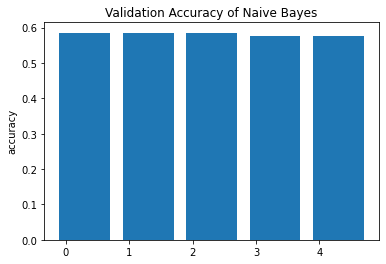

In [54]:
scores_nb = cross_val_score(estimator=clf, X=X, y=y, cv = 5)
index = np.arange(5) + 0.3
print(scores_nb)
plt.bar(index, scores_nb)
plt.ylabel("accuracy")
plt.title('Validation Accuracy of Naive Bayes')

### 5. KNN

Test Accuracy: 0.4634146341463415


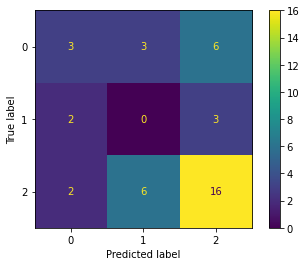

In [55]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
print('Test Accuracy:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test)

In [56]:
df_pred = XX_test.copy()
df_pred['prediction'] = pred_y
df_pred['prediction'] = df_pred['prediction'].replace(0, 'France')
df_pred['prediction'] = df_pred['prediction'].replace(1, 'Japan')
df_pred['prediction'] = df_pred['prediction'].replace(2, 'United Kingdom')
genres = df_pred['country'].values
df_pred = df_pred.drop(['country'], axis = 1)
df_pred.insert(7, 'country', genres)
df_pred.head(10)

,budget,popularity,revenue,runtime,vote_average,vote_count,countryID,country,prediction
1460,90000000.0,24.305260,263920180.0,126.0,7.3,3962.0,0,France,United Kingdom
1162,15000000.0,10.893332,69995385.0,216.0,7.8,870.0,2,United Kingdom,Japan
13264,41677699.0,8.470945,187479518.0,100.0,7.5,953.0,1,Japan,United Kingdom
7878,14500000.0,5.892859,65497208.0,82.0,5.5,367.0,0,France,Japan
6226,5300000.0,5.943950,3897799.0,122.0,7.0,276.0,0,France,Japan
3794,3000000.0,8.541732,12090735.0,97.0,6.3,227.0,2,United Kingdom,United Kingdom
18199,10000000.0,6.091224,17511906.0,111.0,7.2,200.0,0,France,United Kingdom
25202,55000000.0,15.686837,259207227.0,95.0,7.0,899.0,2,United Kingdom,United Kingdom
43738,3500000.0,1.333969,1492523.0,105.0,7.3,34.0,0,France,United Kingdom
28784,4000000.0,5.099557,29456000.0,100.0,6.3,98.0,0,France,United Kingdom


[0.63414634 0.48780488 0.58536585 0.525      0.525     ]


Text(0.5, 1.0, 'Validation Accuracy of KNN')

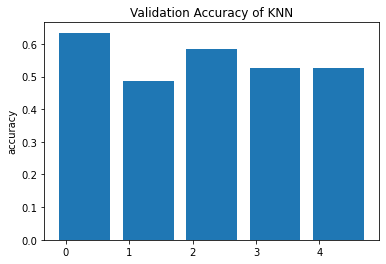

In [57]:
scores_knn = cross_val_score(estimator=clf, X=X, y=y, cv = 5)
index = np.arange(5) + 0.3
print(scores_knn)
plt.bar(index, scores_knn)
plt.ylabel("accuracy")
plt.title('Validation Accuracy of KNN')

### 6. Logistic Regression

Test Accuracy: 0.5853658536585366


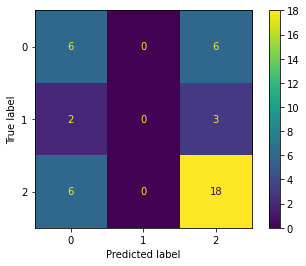

In [58]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
print('Test Accuracy:', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test)

In [59]:
df_pred = XX_test.copy()
df_pred['prediction'] = pred_y
df_pred['prediction'] = df_pred['prediction'].replace(0, 'France')
df_pred['prediction'] = df_pred['prediction'].replace(1, 'Japan')
df_pred['prediction'] = df_pred['prediction'].replace(2, 'United Kingdom')
genres = df_pred['country'].values
df_pred = df_pred.drop(['country'], axis = 1)
df_pred.insert(7, 'country', genres)
df_pred.head(10)

,budget,popularity,revenue,runtime,vote_average,vote_count,countryID,country,prediction
1460,90000000.0,24.305260,263920180.0,126.0,7.3,3962.0,0,France,United Kingdom
1162,15000000.0,10.893332,69995385.0,216.0,7.8,870.0,2,United Kingdom,United Kingdom
13264,41677699.0,8.470945,187479518.0,100.0,7.5,953.0,1,Japan,United Kingdom
7878,14500000.0,5.892859,65497208.0,82.0,5.5,367.0,0,France,United Kingdom
6226,5300000.0,5.943950,3897799.0,122.0,7.0,276.0,0,France,France
3794,3000000.0,8.541732,12090735.0,97.0,6.3,227.0,2,United Kingdom,United Kingdom
18199,10000000.0,6.091224,17511906.0,111.0,7.2,200.0,0,France,United Kingdom
25202,55000000.0,15.686837,259207227.0,95.0,7.0,899.0,2,United Kingdom,United Kingdom
43738,3500000.0,1.333969,1492523.0,105.0,7.3,34.0,0,France,France
28784,4000000.0,5.099557,29456000.0,100.0,6.3,98.0,0,France,United Kingdom


[0.63414634 0.53658537 0.46341463 0.475      0.45      ]


Text(0.5, 1.0, 'Validation Accuracy of Logistic Regression')

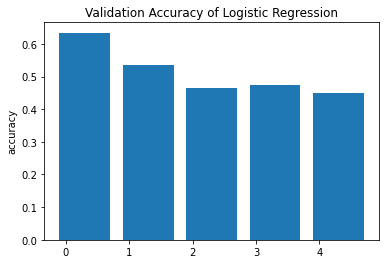

In [60]:
scores_lr = cross_val_score(estimator=clf, X=X, y=y, cv = 5)
index = np.arange(5) + 0.3
print(scores_lr)
plt.bar(index, scores_lr)
plt.ylabel("accuracy")
plt.title('Validation Accuracy of Logistic Regression')

In [61]:
result = pd.DataFrame(
    {'Decision TreeClassifier': scores_dt,
     'SVM': scores_svm,
     'Adaboost Classifier': scores_ad,
     'Naive Bayes':scores_nb,
     'KNN':scores_knn,
     'Logistic Classifier':scores_lr
    })
mean = np.mean(result.values, axis=0)
result = result.transpose()
result['mean'] = mean
result

,0,1,2,3,4,mean
Decision TreeClassifier,0.560976,0.512195,0.487805,0.475,0.550,0.517195
SVM,0.609756,0.609756,0.585366,0.600,0.650,0.610976
Adaboost Classifier,0.463415,0.560976,0.585366,0.525,0.550,0.536951
Naive Bayes,0.585366,0.585366,0.585366,0.575,0.575,0.581220
KNN,0.634146,0.487805,0.585366,0.525,0.525,0.551463
Logistic Classifier,0.634146,0.536585,0.463415,0.475,0.450,0.511829


Support Vector machine gives the hightest test accuracy.